In [1]:
from __future__ import print_function, division
%matplotlib inline

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [2]:
import numpy as np
import modisco
import sys
print (sys.version)
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "4"

Couldn't import dot_parser, loading of dot files will not be possible.
2.7.12 |Anaconda 2.1.0 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


TF-MoDISco is using the TensorFlow backend.


In [12]:
%%bash

[[ -e scores.h5 ]] || wget https://raw.githubusercontent.com/AvantiShri/model_storage/23d8f3ffc89af210f6f0bf7e65585eff259ba672/modisco/scores.h5
[[ -e sequences.simdata.gz ]] || wget https://raw.githubusercontent.com/AvantiShri/model_storage/db919b12f750e5844402153233249bb3d24e9e9a/deeplift/genomics/sequences.simdata.gz
[[ -e test.txt.gz ]] || wget https://raw.githubusercontent.com/AvantiShri/model_storage/9aadb769735c60eb90f7d3d896632ac749a1bdd2/deeplift/genomics/test.txt.gz

In [13]:
import gzip

def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

#read in the data in the testing set
test_ids_fh = gzip.open("test.txt.gz","rb")
ids_to_load = set([x.rstrip() for x in test_ids_fh])

fasta_sequences = []
for i,a_line in enumerate(gzip.open("sequences.simdata.gz","rb")):
    if (i==0):
        next
    a_line = a_line.rstrip()
    seq_id,seq_fasta,embeddings,task1,task2,task3 = a_line.split(b"\t")
    if seq_id in ids_to_load:
        fasta_sequences.append(seq_fasta.decode("utf-8"))

In [61]:
import h5py
from collections import OrderedDict

task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()

n = 150
f = h5py.File("scores.h5","r")
tasks = f["contrib_scores"].keys()
for task in tasks:
    #Note that the sequences can be of variable lengths;
    #in this example they all have the same length (200bp) but that is
    #not necessary.
    task_to_scores[task] = ([np.array(x) for x in f['contrib_scores'][task][:n]]+
                            [np.array(x)[::-1,::-1] for x in f['contrib_scores'][task][:n]])
    task_to_hyp_scores[task] = ([np.array(x) for x in f['hyp_contrib_scores'][task][:n]]+
                                [np.array(x)[::-1,::-1] for x in f['hyp_contrib_scores'][task][:n]])

onehot_data = ([one_hot_encode_along_channel_axis(seq) for seq in fasta_sequences[:n]]+
               [one_hot_encode_along_channel_axis(seq)[::-1,::-1] for seq in fasta_sequences[:n]])

On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= -0.014661998412571847
Computing threshold
Thresholds from null dist were -1.1321079  and  1.0879883
Final raw thresholds are -1.1321079  and  1.0879883
Final transformed thresholds are -0.8631003584229391  and  0.859068100358423


TF-MoDISco is using the TensorFlow backend.


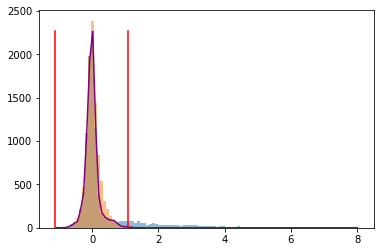

Got 541 coords
On task task1
Computing windowed sums on original
Generating null dist
peak(mu)= 0.005528203842695803
Computing threshold
Thresholds from null dist were -0.94034374  and  0.61260456
Final raw thresholds are -0.94034374  and  0.61260456
Final transformed thresholds are -0.905089605734767  and  0.8824731182795699


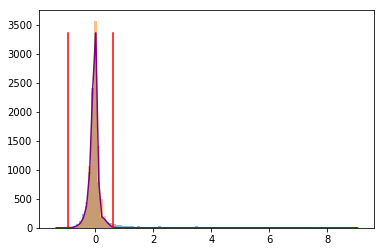

Got 448 coords
On task task2
Computing windowed sums on original
Generating null dist
peak(mu)= 0.013941908532753587
Computing threshold
Thresholds from null dist were -0.62859  and  0.7084457
Final raw thresholds are -0.62859  and  0.7084457
Final transformed thresholds are -0.8708960573476703  and  0.8773835125448028


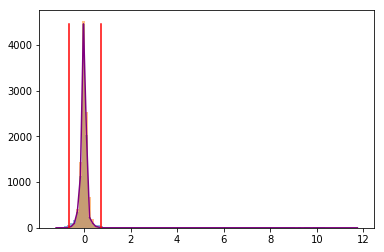

Got 478 coords
After resolving overlaps, got 820 seqlets
Across all tasks, the weakest transformed threshold used was: 0.859068000358423
820 identified in total
2 activity patterns with support >= 100 out of 27 possible patterns
Metacluster sizes:  [340, 322]
Idx to activities:  {0: '1,0,1', 1: '1,1,0'}
On metacluster 1
Metacluster size 322
Relevant tasks:  ('task0', 'task1')
Relevant signs:  (1, 1)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 322
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 0.06 s
Starting affinity matrix computations
Normalization computed in 0.0 s
Cosine similarity mat computed in 0.0 s
Finished affinity matrix computations in 0.01 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.01 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 3.08 s
(Round 1) Comp

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.1s finished


Job completed in: 1.9 s
(Round 2) Computed affinity matrix on nearest neighbors in 2.07 s
Not applying filtering for rounds above first round
(Round 2) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 244 samples in 0.000s...
[t-SNE] Computed neighbors for 244 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 244 / 244
[t-SNE] Mean sigma: 0.221981
(Round 2) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.0282511711121 seconds
Running Louvain modularity optimization
Louvain completed 200 runs in 2.33175396919 seconds
Wrote graph to binary file in 0.0474691390991 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.65597
Louvain completed 51 runs in 1.13874602318 seconds
Preproc + Louvain took 3.59213018417 s
Got 6 clusters after round 2
Counts:
{0: 69, 1: 69, 2: 47, 3: 47, 4: 6, 5: 6}
(Round 2) Aggregating seqlets in each cluster
Aggregating for 

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.0s finished


Computing pattern to pattern distances
Collapsing 0 & 2 with prob 0.014567937254193704 and sim 1.9787916517340098
Collapsing 1 & 3 with prob 0.014567937254193678 and sim 1.9787916517340096
Trimmed 0 out of 116
Trimmed 0 out of 116
On merging iteration 2
Computing pattern to seqlet distances
Computing pattern to pattern distances
Got 4 patterns after merging
Performing seqlet reassignment
Cross contin jaccard time taken: 0.35 s
Discarded 2 seqlets
Got 2 patterns after reassignment
Total time taken is 19.62s
On metacluster 0
Metacluster size 340
Relevant tasks:  ('task0', 'task2')
Relevant signs:  (1, 1)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 340
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 0.07 s
Starting affinity matrix computations
Normalization computed in 0.0 s
Cosine similarity mat computed in 0.0 s
Finished affinity matrix computations in 0.01 s
(Round 1) Compute nearest neighb

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.5s finished


Job completed in: 2.09 s
(Round 2) Computed affinity matrix on nearest neighbors in 2.28 s
Not applying filtering for rounds above first round
(Round 2) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 248 samples in 0.000s...
[t-SNE] Computed neighbors for 248 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 248 / 248
[t-SNE] Mean sigma: 0.211445
(Round 2) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.0219419002533 seconds
Running Louvain modularity optimization
Louvain completed 200 runs in 2.57471299171 seconds
Wrote graph to binary file in 0.0269219875336 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.664847
Louvain completed 51 runs in 1.11765694618 seconds
Preproc + Louvain took 3.78296899796 s
Got 5 clusters after round 2
Counts:
{0: 88, 1: 71, 2: 36, 3: 36, 4: 17}
(Round 2) Aggregating seqlets in each cluster
Aggregating for clu

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


Computing pattern to pattern distances
Collapsing 1 & 4 with prob 4.2781925035392566e-05 and sim 1.9449338682497401
Collapsing 1 & 2 with prob 0.0014503324709545563 and sim 1.9418316109574982
Collapsing 0 & 3 with prob 0.0013549672106198554 and sim 1.9360816724586154
Collapsing 2 & 4 with prob 2.6662647314227138e-06 and sim 1.8611071082253499
Trimmed 0 out of 87
Trimmed 0 out of 123
Trimmed 0 out of 124
On merging iteration 2
Computing pattern to seqlet distances
Computing pattern to pattern distances
Got 2 patterns after merging
Performing seqlet reassignment
Skipped 3 seqlets
Skipped 3 seqlets
Got 2 patterns after reassignment
Total time taken is 21.61s


In [62]:
import h5py
import numpy as np
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.tensorflow_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    #Slight modifications from the default settings
                    sliding_window_size=15,
                    flank_size=5,
                    target_seqlet_fdr=0.15,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        trim_to_window_size=15,
                        initial_flank_to_add=5,
                        kmer_len=5, num_gaps=1,
                        num_mismatches=0,
                        final_min_cluster_size=60)
                )(
                task_names=["task0", "task1", "task2"],
                contrib_scores=task_to_scores,
                hypothetical_contribs=task_to_hyp_scores,
                one_hot=onehot_data,
                revcomp=False)

## Save and print the results

In [63]:
import h5py
import modisco.util
reload(modisco.util)
!rm results.hdf5
grp = h5py.File("results.hdf5")
tfmodisco_results.save_hdf5(grp)

In [64]:
import h5py
import numpy as np
from collections import OrderedDict
import modisco.util
import modisco.core
reload(modisco.core)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
import modisco.tfmodisco_workflow
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
reload(modisco.tfmodisco_workflow)
from modisco.tfmodisco_workflow import workflow
reload(workflow)
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
                task_names=tasks,
                contrib_scores=task_to_scores,
                hypothetical_contribs=task_to_hyp_scores,
                one_hot=onehot_data,
                revcomp=False)
grp = h5py.File("results.hdf5","r")
tfmodisco_results =\
    workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()

metacluster idx metacluster_0
num seqlets 121
one hot
fwd


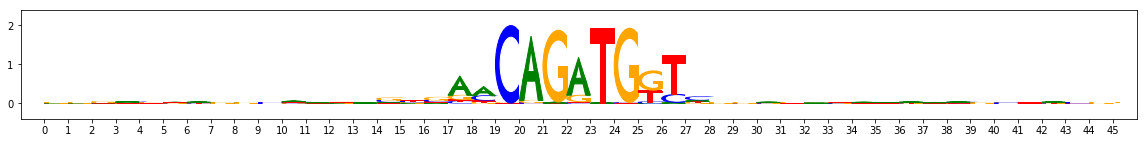

Task 0 hypothetical scores:
fwd


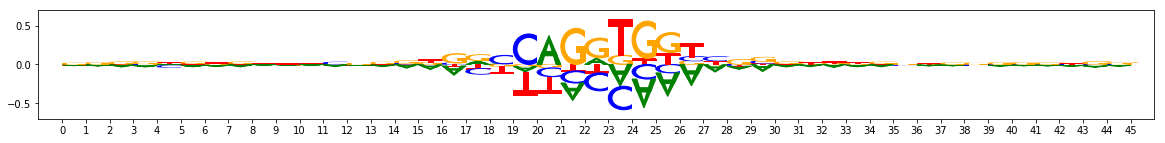

Task 0 actual importance scores:
fwd


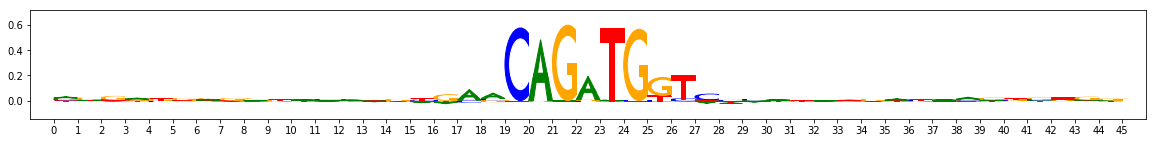

Task 1 hypothetical scores:
fwd


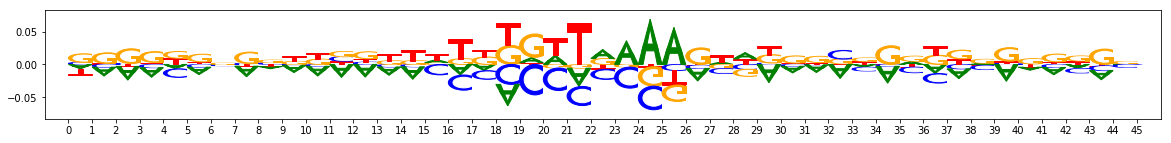

Task 1 actual importance scores:
fwd


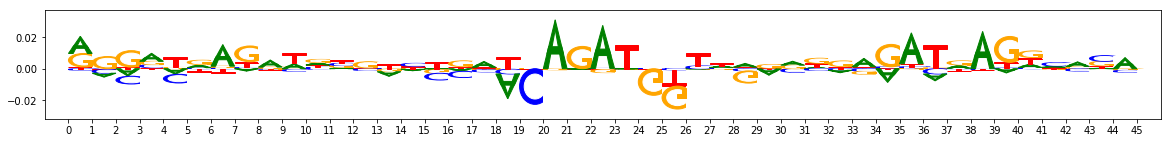

Task 2 hypothetical scores:
fwd


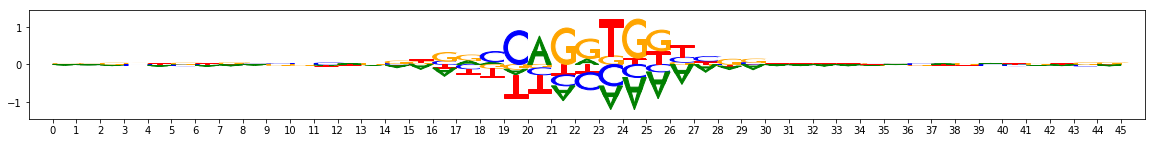

Task 2 actual importance scores:
fwd


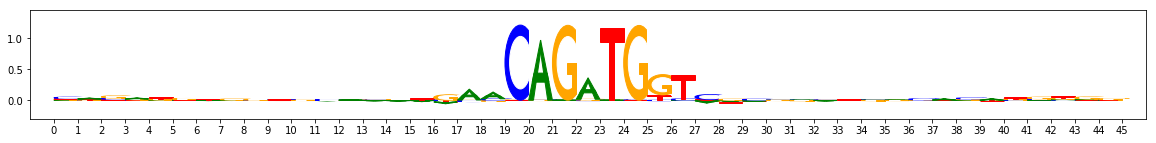

num seqlets 120
one hot
fwd


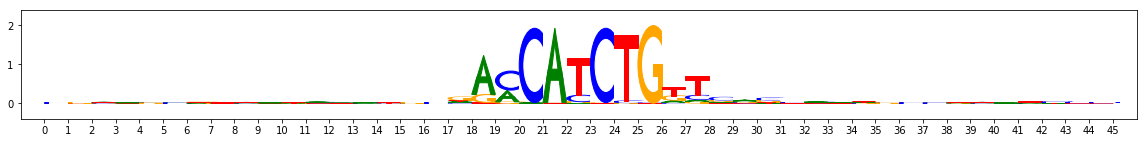

Task 0 hypothetical scores:
fwd


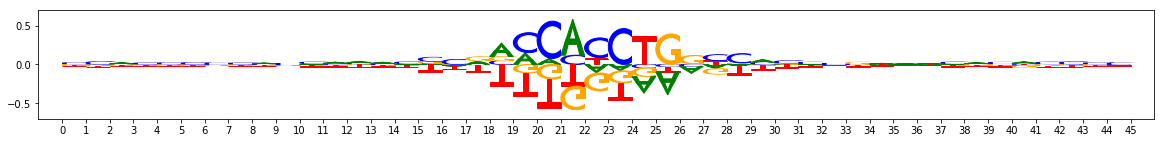

Task 0 actual importance scores:
fwd


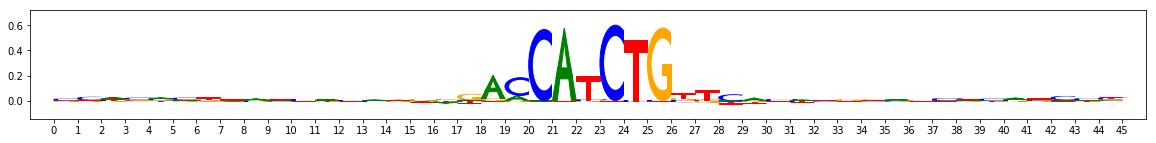

Task 1 hypothetical scores:
fwd


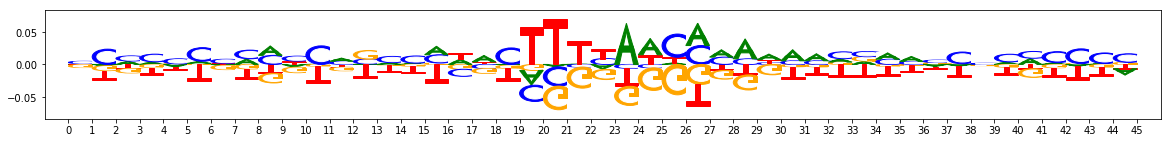

Task 1 actual importance scores:
fwd


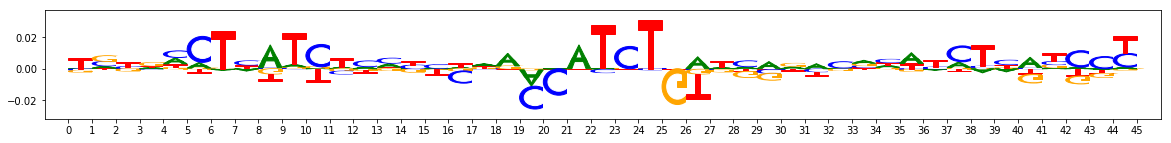

Task 2 hypothetical scores:
fwd


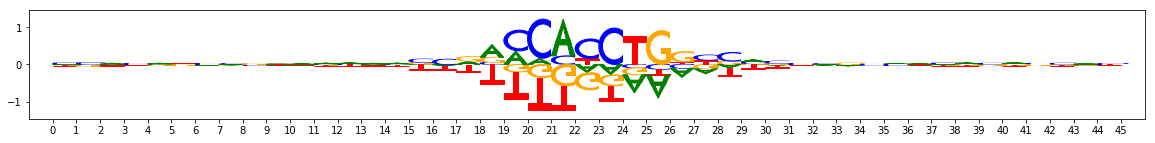

Task 2 actual importance scores:
fwd


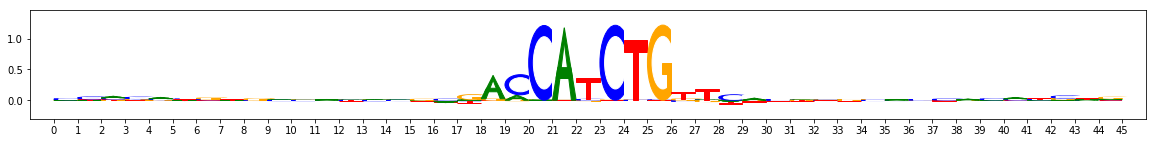

metacluster idx metacluster_1
num seqlets 121
one hot
fwd


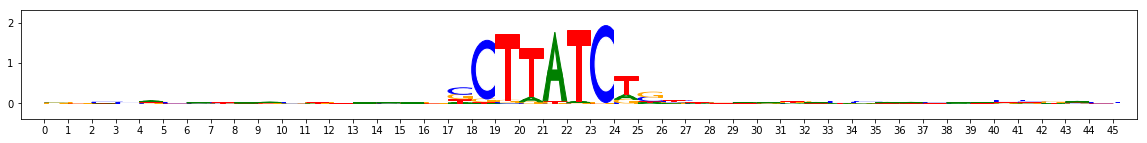

Task 0 hypothetical scores:
fwd


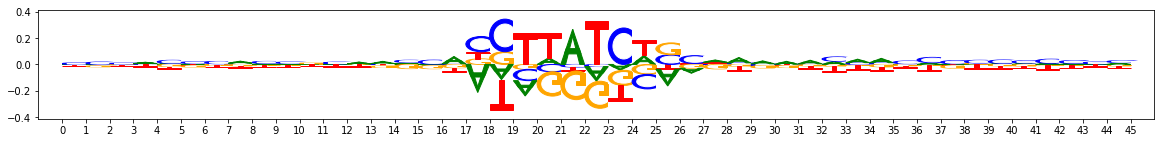

Task 0 actual importance scores:
fwd


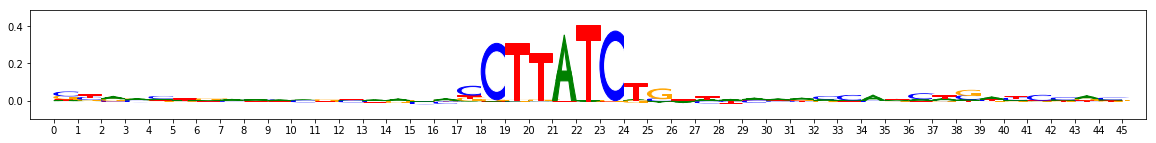

Task 1 hypothetical scores:
fwd


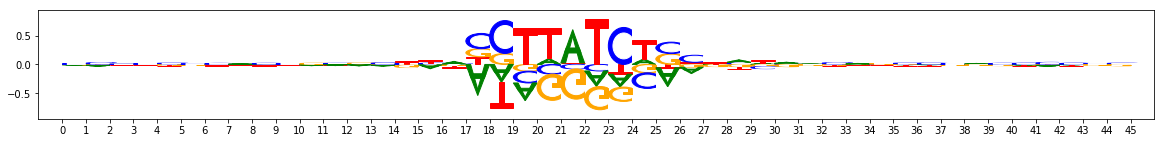

Task 1 actual importance scores:
fwd


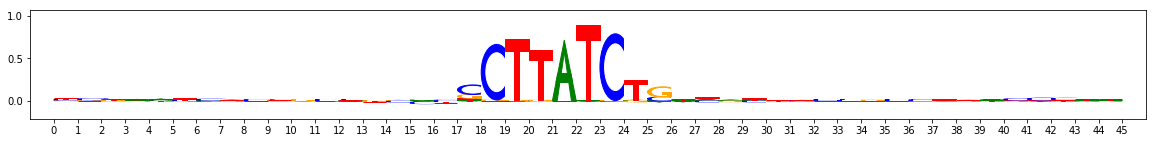

Task 2 hypothetical scores:
fwd


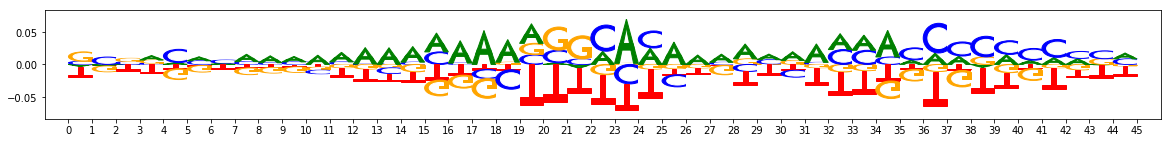

Task 2 actual importance scores:
fwd


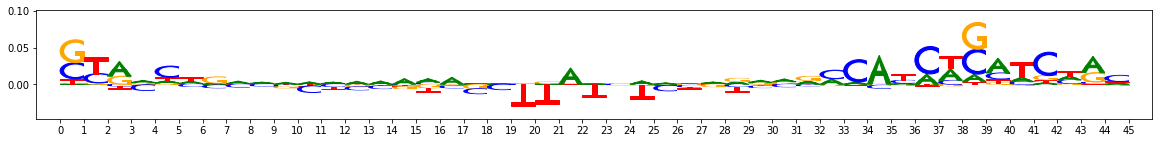

num seqlets 121
one hot
fwd


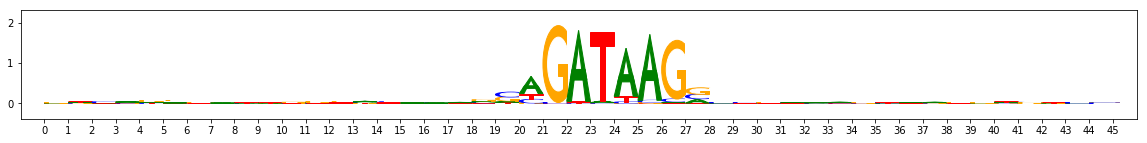

Task 0 hypothetical scores:
fwd


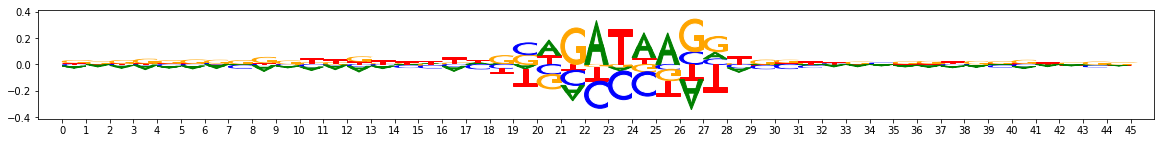

Task 0 actual importance scores:
fwd


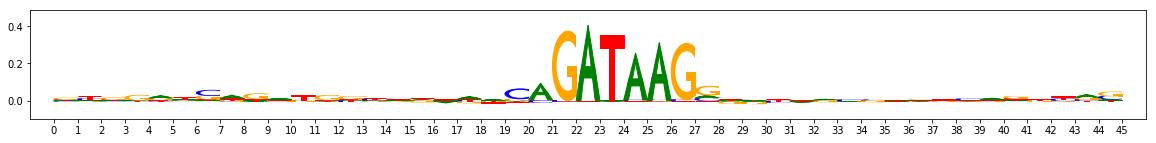

Task 1 hypothetical scores:
fwd


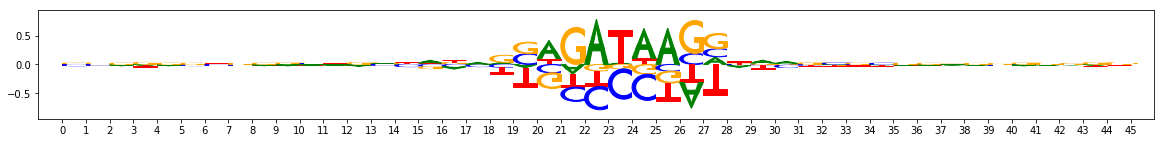

Task 1 actual importance scores:
fwd


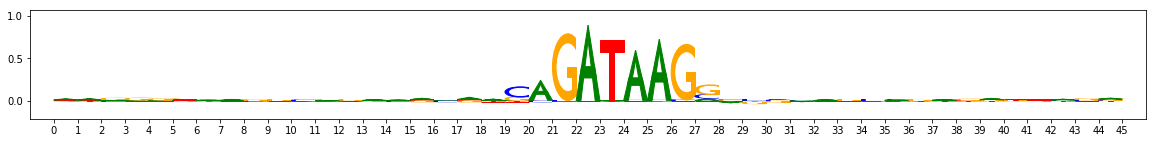

Task 2 hypothetical scores:
fwd


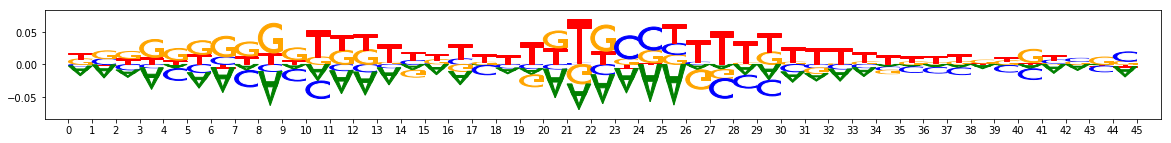

Task 2 actual importance scores:
fwd


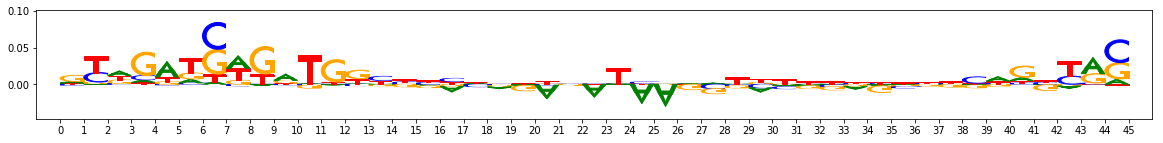

In [66]:
from modisco.visualization import viz_sequence
reload(viz_sequence)

for metacluster_idx in tfmodisco_results.metacluster_idx_to_submetacluster_results:
    print("metacluster idx", metacluster_idx)
    patterns = (tfmodisco_results
          .metacluster_idx_to_submetacluster_results[metacluster_idx]
          .seqlets_to_patterns_result.patterns)
    for pattern in patterns:
        print("num seqlets", len(pattern.seqlets))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        
        print("one hot")
        print("fwd")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"].fwd),
                                                        background=background)) 
        if (pattern["sequence"].rev is not None):
            print("rev")
            viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"].rev),
                                                            background=background)) 
        
        print("Task 0 hypothetical scores:")
        print("fwd")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)
        if (pattern["sequence"].rev is not None):
            print("rev")
            viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].rev)
        print("Task 0 actual importance scores:")
        print("fwd")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
        if (pattern["sequence"].rev is not None):
            print("rev")
            viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].rev)
        
        print("Task 1 hypothetical scores:")
        print("fwd")
        viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"].fwd)
        if (pattern["sequence"].rev is not None):
            print("rev")
            viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"].rev)
        print("Task 1 actual importance scores:")
        print("fwd")
        viz_sequence.plot_weights(pattern["task1_contrib_scores"].fwd)
        if (pattern["sequence"].rev is not None):
            print("rev")
            viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"].rev)
        
        print("Task 2 hypothetical scores:")
        print("fwd")
        viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"].fwd)
        if (pattern["sequence"].rev is not None):
            print("rev")
            viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"].rev)
        print("Task 2 actual importance scores:")
        print("fwd")
        viz_sequence.plot_weights(pattern["task2_contrib_scores"].fwd)
        if (pattern["sequence"].rev is not None):
            print("rev")
            viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"].rev)
        